In [1]:
from IPython.display import display,Math,Latex
import numpy as np
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
import scipy.fftpack as sci

In [13]:
Nx=64
Ny=64
t_min=0.00
t_max=10.00
dt=.0100
nu=0.001
a=2*np.pi
x=np.linspace(0,a,Nx)
y=np.linspace(0,a,Ny)
omega=[[0 for i in range(Ny)] for j in range(Nx)]
omegak_new=[[complex(0,1) for i in range(Ny)] for j in range(Nx)]
omega_new=[[0 for i in range(Ny)] for j in range(Nx)]
Uxomegax=[[0 for i in range(Ny)] for j in range(Nx)]
Uyomegay=[[0 for i in range(Ny)] for j in range(Nx)]
i_domegax=[[complex(0,1) for i in range(Ny)] for j in range(Nx)]
i_domegay=[[complex(0,1) for i in range(Ny)] for j in range(Nx)]
Nlk=[[complex(0,1) for i in range(Ny)] for j in range(Nx)]
dux=[[0 for i in range(Ny)] for j in range(Nx)]
shik=[[complex(0,1) for i in range(Ny)] for j in range(Nx)]
Ukx=[[complex(0,1) for i in range(Ny)] for j in range(Nx)]
Uky=[[complex(0,1) for i in range(Ny)] for j in range(Nx)]
dt_omega_new=[[complex(0,1) for i in range(Ny)] for j in range(Nx)]

k=1
for i in range(0,Nx):
    for j in range(0,Ny):
        omega[i][j]=2.00*(np.sin(x[i])*np.cos(y[j]))
# omegak=sci.fft(omega)


# for i in range(0,Nx):
#     if i<= Nx/2:
#         kx=2.00*(np.pi)*float(i)/a
#     else:
#         kx=2.00*(np.pi)*float(i-Nx)/a
#     for j in range(0,Ny):
#         if j<= Nx/2:
#             ky=2.00*(np.pi)*float(j)/a
#         else:
#             ky=2.00*(np.pi)*float(j-Ny)/a
#         if(i==0 and j==0):
#             shik[i][j]=complex(0.00,0.00)
#             Ukx[i][j]=complex(0.00,0.00)
#             Uky[i][j]=-complex(0.0,0.0)
#         else:
#             shik[i][j]=omegak[i][j]/(kx*kx+ky*ky)
#             Ukx[i][j]=complex(0.0,1.0)*ky*shik[i][j]
#             Uky[i][j]=-complex(0.0,1.0)*kx*shik[i][j]
# shik_dum=shik
# omegak_dum=omegak
# Ukx_dum=Ukx
# Uky_dum=Uky

# shi=sci.ifft(shik_dum).real
# omega=sci.ifft(omegak_dum).real
# Ux=sci.ifft(Ukx_dum).real
# Uy=sci.ifft(Uky_dum).real

for o in range(0,10000):
    omegak=sci.fft2(omega)
    for i in range(0,Nx):
        if i<= Nx/2:
            kx=2.00*(np.pi)*float(i)/a
        else:
            kx=2.00*(np.pi)*float(i-Nx)/a
        for j in range(0,Ny):
            if j<= Nx/2:
                ky=2.00*(np.pi)*float(j)/a
            else:
                ky=2.00*(np.pi)*float(j-Ny)/a
            if(i==0 and j==0):
                shik[i][j]=complex(0.00,0.00)
                Ukx[i][j]=complex(0.00,0.00)
                Uky[i][j]=-complex(0.0,0.0)
            else:
                shik[i][j]=omegak[i][j]/(kx*kx+ky*ky)
                Ukx[i][j]=complex(0.0,1.0)*ky*shik[i][j]
                Uky[i][j]=-1*complex(0.0,1.0)*kx*shik[i][j]
            i_domegax[i][j]=complex(0.0,1.0)*kx*omegak[i][j]
            i_domegay[i][j]=complex(0.0,1.0)*ky*omegak[i][j]
    domegax=sci.ifft2(i_domegax).real
    domegay=sci.ifft2(i_domegay).real
    Ux=sci.ifft2(Ukx).real
    Uy=sci.ifft2(Uky).real
    
    for i in range(0,Nx):
        for j in range(0,Ny):
            Uxomegax[i][j]=Ux[i][j]*domegax[i][j]
            Uyomegay[i][j]=Uy[i][j]*domegay[i][j]
    k_Uxomegax=sci.fft2(Uxomegax)
    k_Uyomegay=sci.fft2(Uyomegay)
    
#     De-Aliazing technique - 2/3 Truncation
    for i in range(0,Nx):
        if i<= Nx/2:
            kx=2.00*(np.pi)*float(i)/a
        else:
            kx=2.00*(np.pi)*float(i-Nx)/a
        for j in range(0,Ny):
            if j<= Nx/2:
                ky=2.00*(np.pi)*float(j)/a
            else:
                ky=2.00*(np.pi)*float(j-Ny)/a
                
            if(np.sqrt(kx*kx+ky*ky)>=(float(Nx+Ny)/2.0)/3.0):
                k_Uxomegax[i][j]=0.0
                k_Uyomegay[i][j]=0.0
            Nlk[i][j]=k_Uxomegax[i][j]+k_Uyomegay[i][j]
            Nlk[i][j]=Nlk[i][j]+nu*(kx*kx*omegak[i][j]+ky*ky*omegak[i][j])
    
            
#     ab(Nx,Ny,time,dt,omegak,omegak_new)
    
    for i in range(0,Nx):
        for j in range(0,Ny):
            dt_omega_new[i][j]=-1*Nlk[i][j]
            if o==0:
                   omegak[i][j]=omegak[i][j]+dt*dt_omega_new[i][j]
            else:
                omegak[i][j]=omegak[i][j]+dt*((3.0/2.0)*dt_omega_new[i][j]-0.5*dt_omega_old[i][j])
    dt_omega_old=dt_omega_new
#     omegak=omegak_new
    omega=sci.ifft2(omegak).real
    
            

<ipython-input-13-dd6f31d1c045>:88: RuntimeWarning: overflow encountered in double_scalars
  Uxomegax[i][j]=Ux[i][j]*domegax[i][j]
<ipython-input-13-dd6f31d1c045>:89: RuntimeWarning: overflow encountered in double_scalars
  Uyomegay[i][j]=Uy[i][j]*domegay[i][j]


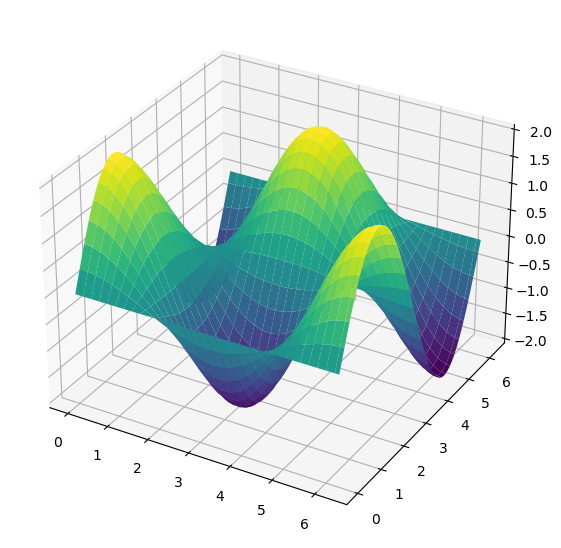

In [25]:
# from matplotlib import pyplot, cm
# fig = plt.figure(figsize=(11, 7), dpi=100)
# ax = fig.gca(projection='3d')                      
# X, Y = np.meshgrid(x, y)                            
# surf = ax.plot_surface(X, Y, omega,cmap=cm.viridis)


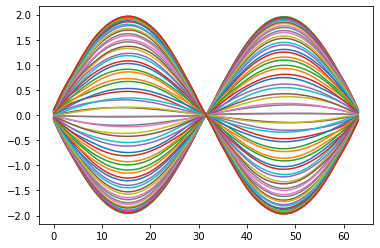

In [6]:
plt.plot(omega)


In [7]:
omeg=[[0 for i in range(Ny)] for j in range(Nx)]
for i in range(0,Nx):
    for j in range(0,Ny):
        omeg[i][j]=(np.sin(x[i])*np.cos(y[j]))*2.00
ome=sci.fft(omeg)
omeg=sci.ifft(ome).real

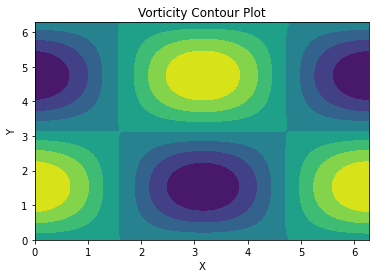

In [8]:
[X, Y] = np.meshgrid(x, y)
  
fig, ax = plt.subplots(1, 1)
  
  
# plots filled contour plot
ax.contourf(X, Y, omega)
  
ax.set_title('Vorticity Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

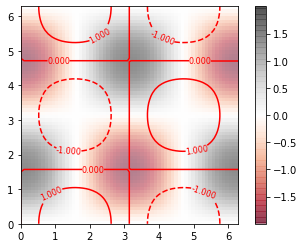

In [9]:

contours = plt.contour(Y, X, omeg, 3, colors='red')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(omeg, extent=[0, a, 0, a], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

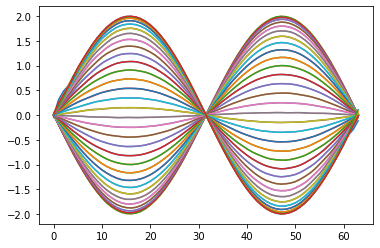

In [117]:
plt.plot(omega)

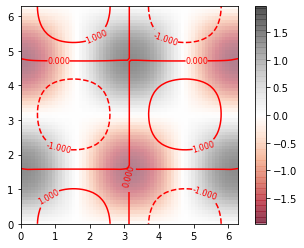

In [10]:
contours = plt.contour(Y, X, omega, 3, colors='red')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(omega, extent=[0, a, 0, a], origin='lower',
           cmap='RdGy', alpha=.5)
plt.colorbar();

In [11]:
omega.max()

1.966375650704537

In [12]:
omeg.max()

1.9993783640016327